# Investigating unadjusted p-values from eQTL analysis

__Author:__ Bryan Quach  
__Date:__ April 11, 2017

### Estimated Analysis Time: <1 days

## Objective

There are multiple objectives of this analysis. Generally, the goal is to get a sense for expected results once multiple testing correction has been applied to the initial results. In a sense, we can consider the observations from this analysis as pre-liminary results. This analysis will address the following questions:

* How many total comparisons were done?
* How many genes were tested? How many markers were tested?
* What is the distribution of markers tested per gene?
* What is the p-value distribution of our results?
* Which gene and marker comparisons produced the most significant hits?

## Software required

* [dplyr (R package)](https://cran.r-project.org/web/packages/dplyr/index.html)

## The Data

The data that we work with are results output from running a modified version of Daniel Oreper's eQTL analysis software. This software produces an R data file containing the environment in which the analysis was run, which includes a matrix of p-values with rows and columns corresponding to genes and markers respectively. In this analysis, we will look at results for the eQTL analyses in lung, liver, and kidney control samples.

## Calculating analysis statistics

### Lung

In [2]:
load("data/control_lung.Rdata")

#Calculate total number of comparisons
total.runs.lung <- length(which(!is.na(unlist(out.mat))))

#Calculate number of genes and markers tested
num.genes.tested.lung <- length(which(apply(out.mat, 1, function(x){length(which(!is.na(x)))}) > 0))
num.markers.tested.lung <- length(which(apply(out.mat, 2, function(x){length(which(!is.na(x)))}) > 0))

#Get distribution of markers tested per gene
m.per.gene.lung <- apply(out.mat, 1, function(x){length(which(!is.na(x)))})

#Get unadjusted p-values
pvals.lung <- na.omit(as.numeric(unlist(out.mat)))

### Liver

In [3]:
load("data/control_liver.Rdata")

#Calculate total number of comparisons
total.runs.liver <- length(which(!is.na(unlist(out.mat))))

#Calculate number of genes and markers tested
num.genes.tested.liver <- length(which(apply(out.mat, 1, function(x){length(which(!is.na(x)))}) > 0))
num.markers.tested.liver <- length(which(apply(out.mat, 2, function(x){length(which(!is.na(x)))}) > 0))

#Get distribution of markers tested per gene
m.per.gene.liver <- apply(out.mat, 1, function(x){length(which(!is.na(x)))})

#Get unadjusted p-values
pvals.liver <- na.omit(as.numeric(unlist(out.mat)))

### Kidney

In [4]:
load("data/control_kidney.Rdata")

#Calculate total number of comparisons
total.runs.kidney <- length(which(!is.na(unlist(out.mat))))

#Calculate number of genes and markers tested
num.genes.tested.kidney <- length(which(apply(out.mat, 1, function(x){length(which(!is.na(x)))}) > 0))
num.markers.tested.kidney <- length(which(apply(out.mat, 2, function(x){length(which(!is.na(x)))}) > 0))

#Get distribution of markers tested per gene
m.per.gene.kidney <- apply(out.mat, 1, function(x){length(which(!is.na(x)))})

#Get unadjusted p-values
pvals.kidney <- na.omit(as.numeric(unlist(out.mat)))

## Plotting statistics

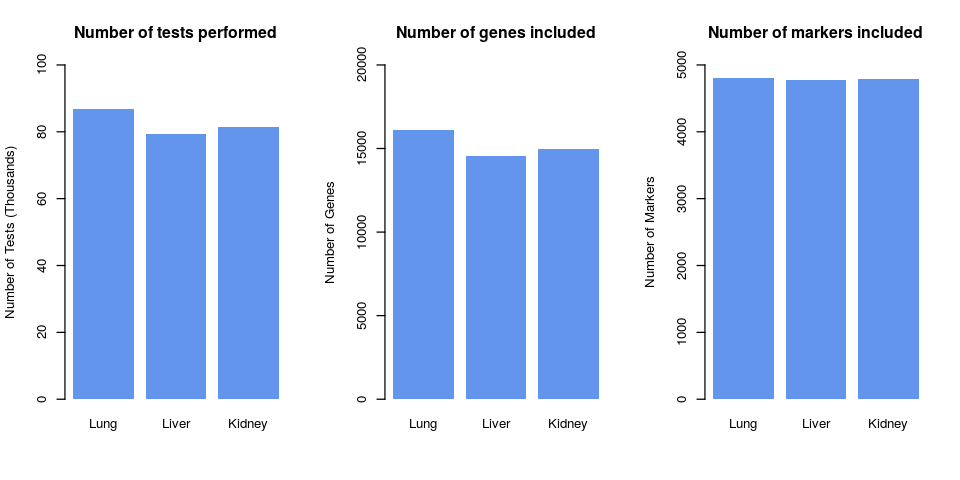

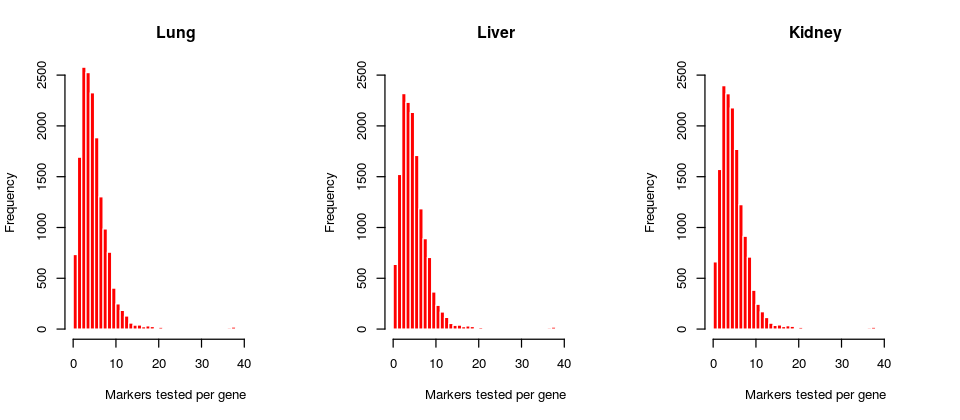

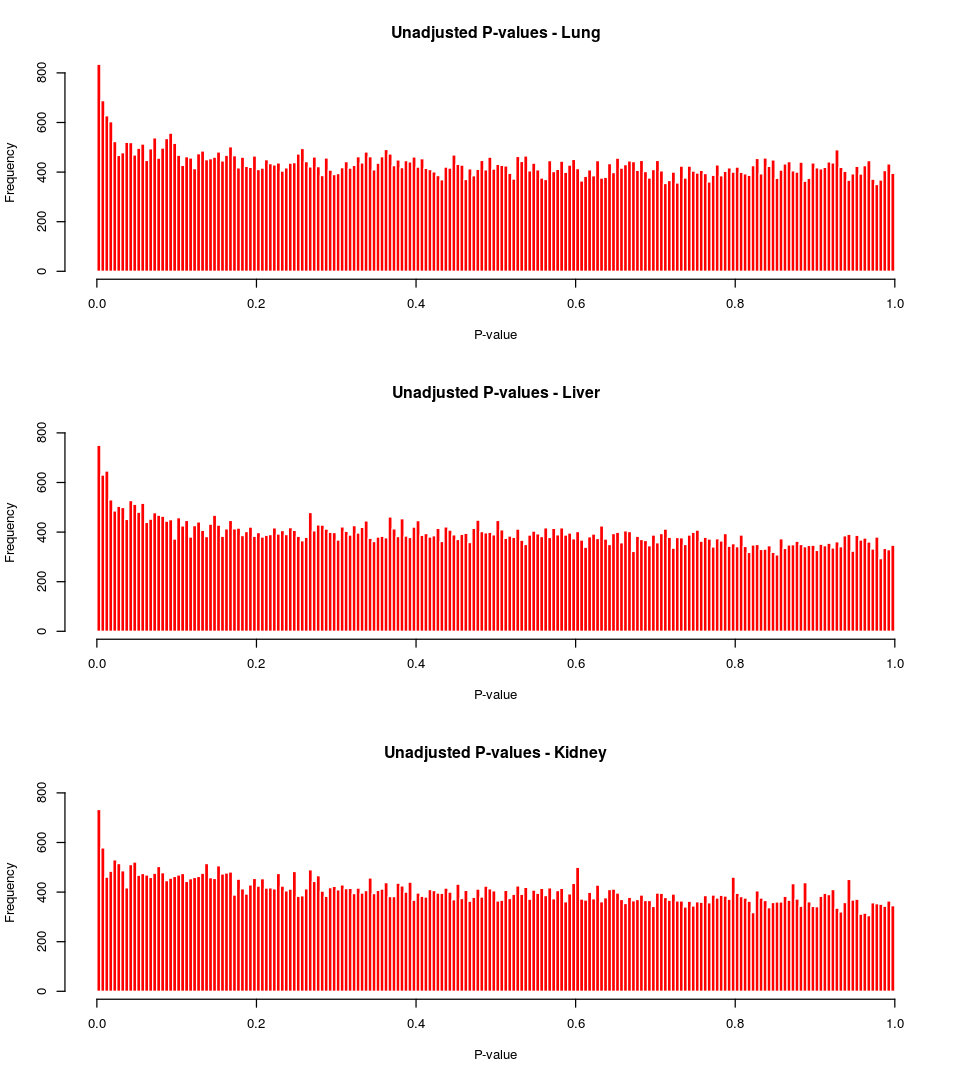

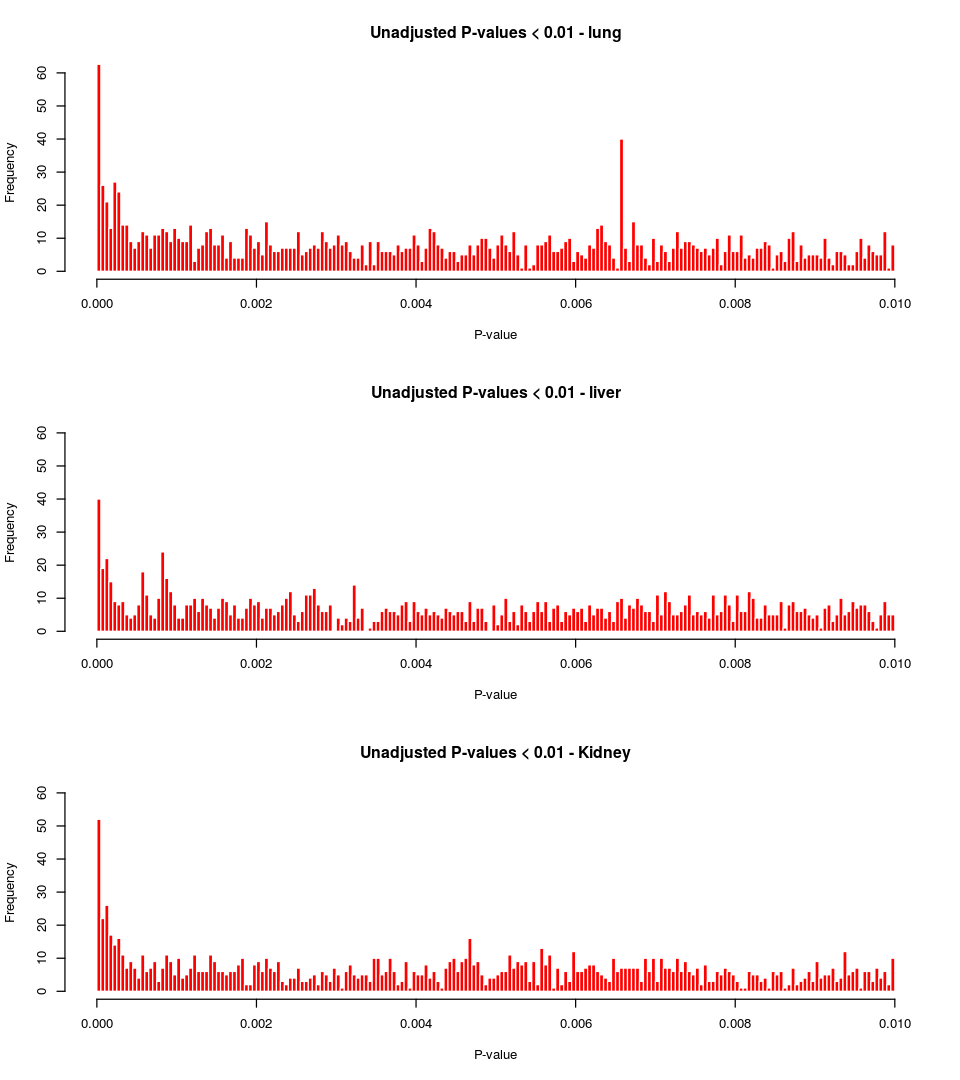

In [85]:
library(repr)
options(repr.plot.width=8, repr.plot.height=4)

total.runs <- c(total.runs.lung, total.runs.liver, total.runs.kidney)
num.genes.tested <- c(num.genes.tested.lung, num.genes.tested.liver, num.genes.tested.kidney)
num.markers.tested <- c(num.markers.tested.lung, num.markers.tested.liver, num.markers.tested.kidney)

#Number of tests, genes, and markers
par(mfrow=c(1,3))
barplot(height=total.runs/1000, beside=T, ylab="Number of Tests (Thousands)", ylim=c(0,100),
        border=NA, col="cornflowerblue",
        names.arg=c("Lung","Liver","Kidney"), 
        main="Number of tests performed")
barplot(height=num.genes.tested, beside=T, ylab="Number of Genes", ylim=c(0,20000),
        border=NA, col="cornflowerblue",
        names.arg=c("Lung","Liver","Kidney"), 
        main="Number of genes included")
barplot(height=num.markers.tested, beside=T, ylab="Number of Markers", ylim=c(0,5000),
        border=NA, col="cornflowerblue",
        names.arg=c("Lung","Liver","Kidney"), 
        main="Number of markers included")

#Markers per gene
options(repr.plot.width=8, repr.plot.height=3.5)
par(mfrow=c(1,3))
hist(m.per.gene.lung, breaks=49, freq=T, ylim=c(0,2500), 
     col="red", border="white",
     main="Lung",
     ylab="Frequency", 
     xlab="Markers tested per gene")
hist(m.per.gene.liver, breaks=49, freq=T, ylim=c(0,2500), 
     col="red", border="white",
     main="Liver",
     ylab="Frequency", 
     xlab="Markers tested per gene")
hist(m.per.gene.kidney, breaks=49, freq=T, ylim=c(0,2500), 
     col="red", border="white",
     main="Kidney",
     ylab="Frequency", 
     xlab="Markers tested per gene")

#P-value distributions
options(repr.plot.width=8, repr.plot.height=9)
par(mfrow=c(3,1))
hist(pvals.lung, breaks=200, freq=T, ylim=c(0,800), 
     col="red", border="white",
     main="Unadjusted P-values - Lung",
     ylab="Frequency",
     xlab="P-value")
hist(pvals.liver, breaks=200, freq=T, ylim=c(0,800), 
     col="red", border="white",
     main="Unadjusted P-values - Liver",
     ylab="Frequency", 
     xlab="P-value")
hist(pvals.kidney, breaks=200, freq=T, ylim=c(0,800), 
     col="red", border="white",
     main="Unadjusted P-values - Kidney",
     ylab="Frequency", 
     xlab="P-value")

par(mfrow=c(3,1))
hist(pvals.lung[which(pvals.lung < 0.01)], breaks=200, freq=T, ylim=c(0,60), 
     col="red", border="white",
     main="Unadjusted P-values < 0.01 - lung",
     ylab="Frequency", 
     xlab="P-value")
hist(pvals.liver[which(pvals.liver < 0.01)], breaks=200, freq=T, ylim=c(0,60), 
     col="red", border="white",
     main="Unadjusted P-values < 0.01 - liver",
     ylab="Frequency", 
     xlab="P-value")
hist(pvals.kidney[which(pvals.kidney < 0.01)], breaks=200, freq=T, ylim=c(0,60), 
     col="red", border="white",
     main="Unadjusted P-values < 0.01 - Kidney",
     ylab="Frequency", 
     xlab="P-value")


## Retrieving most significant tests

For each tissue, we retrieve the 100 gene-marker pairs that produced the most significant p-values and list them below.

In [5]:
library(dplyr)

# Function for searching p-value matrix
#
# Args:
#   needle - value to find
#   haystack - matrix to search through
#
# Returns a dataframe of the p-values with gene and marker names listed
find.value <- function(needle, haystack){
    hits <- which(haystack==needle, arr.ind=T)
    rnames <- rownames(haystack)[hits[,1]]
    cnames <- colnames(haystack)[hits[,2]]
    results <- c()
    for(i in 1:nrow(hits)){
        record <- c(rnames[i], cnames[i], needle)
        results <- rbind(results, record)
    }
    return(data.frame(results))
}

#Get p-value matrices for each tissue
load("data/control_lung.Rdata")
matrix.lung <- out.mat
load("data/control_liver.Rdata")
matrix.liver <- out.mat
load("data/control_kidney.Rdata")
matrix.kidney <- out.mat


#Get top 100 p-values per tissue
top.lung <- sort(pvals.lung)[1:100]
top.liver <- sort(pvals.liver)[1:100]
top.kidney <- sort(pvals.kidney)[1:100]

#Create gene and marker list for significant hits
lung.list <- bind_rows(lapply(top.lung, function(x){find.value(x, matrix.lung)}))
liver.list <- bind_rows(lapply(top.liver, function(x){find.value(x, matrix.liver)}))
kidney.list <- bind_rows(lapply(top.kidney, function(x){find.value(x, matrix.kidney)}))
colnames(lung.list) <- c("Gene", "Marker", "P-value")
colnames(liver.list) <- c("Gene", "Marker", "P-value")
colnames(kidney.list) <- c("Gene", "Marker", "P-value")

Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”

In [6]:
#Display tables
cat("Lung\n")
lung.list
cat("Liver\n")
liver.list
cat("Kidney\n")
kidney.list

#Write tables to file
write.table(x=lung.list, file="results/lung_top100_hits_unadjusted_pvals.txt", 
            quote=F, row.names=F, col.names=T, sep="\t")
write.table(x=liver.list, file="results/liver_top100_hits_unadjusted_pvals.txt", 
            quote=F, row.names=F, col.names=T, sep="\t")
write.table(x=kidney.list, file="results/kidney_top100_hits_unadjusted_pvals.txt", 
            quote=F, row.names=F, col.names=T, sep="\t")

Lung


Gene     Marker                         P-value             
1   AI597479 JAX00248662.UNC541737          1.52198445803807e-86
2   AI597479 UNC533184.UNC536663            1.86176777900774e-45
3   Sdhaf1   UNC12572462.UNC12573732        4.33952379616547e-40
4   Dnah7b   UNC578793.UNC597735            1.4403874769642e-21 
5   Gm3414   UNC9076911.UNC9083687          1.24978466405426e-20
6   Syne4    UNC12572462.UNC12573732        3.57460392130674e-18
7   Tpp2     UNC550060.UNC557806            4.82828420927643e-13
8   Tpp2     JAX00249009.UNC577593          5.10304574108778e-13
9   Srpk2    UNC8769425.UNC8791233          5.18959602379832e-13
10  Tpp2     JAX00248843.JAX00248843        5.19113972682496e-13
11  Tpp2     UNC547351.UNC549896            5.29334763368502e-13
12  Tpp2     JAX00248770.UNC547234          5.43835981439612e-13
13  Bzw1     UNC718116.UNC734946            4.27550206204869e-12
14  Zbtb49   UNC8990872.UNC8994596          1.12385253852337e-11
15  Dnah7b   JAX00249009.UNC577593          3.78916360537115e-11
16  Tmem147  UNC12572462.UNC12573732        5.62868992165501e-11
17  Dnah7c   UNC578793.UNC597735            8.58159032043292e-11
18  Fam126b  UNC718116.UNC734946            3.70572411843241e-10
19  Ptpn12   UNC8769425.UNC8791233          5.95612112711619e-10
20  Ptpn12   UNC8760878.UNC8769129          6.57973249939902e-10
21  Ptpn12   UNC8744830.UNC8757015          8.77469926415471e-10
22  Ptpn12   UNC8757558.UNC8760307          9.45024829691422e-10
23  Mitd1    JAX00002582.UNC474632          1.99807819298196e-09
24  Paf1     UNC12549403.UNC12567534        2.38683591187166e-09
25  Mitd1    UNC474803.JAX00247605          2.5938656747993e-09 
26  Paf1     UNC12543724.UNC12548710        2.76543377114432e-09
27  Sf3b1    UNC671186.UNC692837            2.95162629046417e-09
28  Paf1     UNC12542093.UNC12543129        3.06653276767516e-09
29  Paf1     UNC12543518.UNC12543518        3.10725997862895e-09
30  Sf3b1    UNC699866.JAX00003956          4.50217026079062e-09
⋮   ⋮        ⋮                              ⋮                   
71  Timm50   UNC12521588.UNC12531236        6.73646953085933e-06
72  Mpc1     UNC27534981.UNC27536218        7.31471001503777e-06
73  Timm50   UNC12542093.UNC12543129        8.33799425168365e-06
74  Sepsecs  UNC9182307.UNC9194098          9.13756855987738e-06
75  Timm50   UNC12543518.UNC12543518        1.01878253687219e-05
76  Col25a1  UNC6250492.UNC6250492          1.02562629135896e-05
77  Timm50   UNC12549403.UNC12567534        1.09270524955555e-05
78  Timm50   UNC12543724.UNC12548710        1.25159741825e-05   
79  Col25a1  UNC6250875.UNC6250875          1.34622795654267e-05
80  Col25a1  UNC6251370.UNC6251370          1.40067718138972e-05
81  Col25a1  UNC6251528.UNC6260458          1.40576120699794e-05
82  Map2     UNC810365.UNC010113351         1.47136477540301e-05
83  Rnf2     UNC1953417.UNC1966373          1.84466664916082e-05
84  Sepsecs  UNC9194356.JAX00582642         1.99071205263306e-05
85  Olfr172  UNC26908820.UNC26909630        2.11545416567406e-05
86  Nhlrc1   UNC22553195.UNC22578692        2.35368096199053e-05
87  Bivm     UNC550060.UNC557806            2.39593446941559e-05
88  Bivm     JAX00249009.UNC577593          2.63127122899437e-05
89  Map2     UNC831500.UNC854778            2.63968495375911e-05
90  Lcorl    UNC9084229.JAX00129566         3.04140744373568e-05
91  Psap     UNC18034355.JAX00290458        3.04392654982258e-05
92  Psap     UNC18049832.JAX00290510        3.2314347487334e-05 
93  Bivm     UNC547351.UNC549896            3.26361212577238e-05
94  Psap     UNC18055450.JAX00018577        3.33309155647468e-05
95  Sepsecs  UNC9178955.JAX00582322         3.54412124921924e-05
96  Tgfbrap1 UNC533184.UNC536663            3.65048608805485e-05
97  Rnf2     JAX00271468.UNC1952460         3.6624067004445e-05 
98  Rnf2     UNC1886404.UNC1949073          3.78123252589867e-05
99  AK010878 UNC21772991.backupUNC120219860 3.8870098250004e-05 
100 Sepsecs  UNC9178217.UNC9178793     

Liver


Gene         Marker                                P-value             
1   Cklf         UNC15401027.JAX00679070               1.23517654343872e-12
2   Cklf         UNC15417874.UNC15422538               1.30662916642778e-12
3   Cklf         UNC15416961.JAX00679081               1.32163565099867e-12
4   Cklf         UNC15422872.UNC15444168               1.45531023581186e-12
5   Ankrd44      UNC699866.JAX00003956                 9.85446836124354e-10
6   Grhl1        JAX00327915.JAX00327915               1.40946486629712e-09
7   Haghl        UNC27715265.UNC27718914               2.72452343643566e-09
8   Haghl        UNC27706510.UNC27714988               2.80987732414863e-09
9   G6pc2        UNC3274971.UNC3298947                 5.18319805829402e-08
10  Npr1         UNC5732520.UNC5752814                 8.87592999381222e-08
11  Grhl1        UNC20742271.JAX00199937               1.35247970979078e-07
12  Haghl        UNC27694572.JAX00434363               4.93899236358172e-07
13  Hist1h1e     UNC22234794.UNC22263112               5.62702497731629e-07
14  Hist1h1e     UNC22263703.UNC22267580               6.25679873753722e-07
15  Haghl        UNC170299097.UNC27694074              6.60291041782978e-07
16  Nfil3        JAX00357912.JAX00357963               2.99908996986772e-06
17  Grhl1        JAX00327082.JAX00327882               3.27003620717022e-06
18  G6pc2        UNC3268533.JAX00095547                4.12104349224922e-06
19  Gtf3c4       UNC2788440.UNC2804046                 4.21422282906587e-06
20  Gtf3c4       UNC2783477.UNC2788235                 4.63132944146615e-06
21  Nfil3        UNC22578796.UNC22595965               4.8752100245389e-06 
22  Ints3        UNC5732520.UNC5752814                 5.15068657569201e-06
23  Abhd13       UNC14155073.UNC14155073               6.08561521020639e-06
24  G6pc2        UNC3274478.UNC3274700                 6.42946646905509e-06
25  Abhd13       JAX00158787.UNC14154785               7.11026276305423e-06
26  G6pc2        UNC3271429.UNC3273914                 9.37593518438726e-06
27  Gtf3c4       UNC2804704.B6_02_030044009_S          9.91045134325707e-06
28  Abhd13       UNC14124729.UNC14147606               1.003123912919e-05  
29  Zfp109       JAX00149345.JAX00149373               1.7334343523956e-05 
30  Dnm2         UNC091275013.UNC15961896              2.09863157139463e-05
⋮   ⋮            ⋮                                     ⋮                   
71  Slc16a3      UNC20527710.UNC20537485               0.000134210824439581
72  Nr1d1        UNC20208047.UNC20210453               0.000135548640469048
73  Ttyh1        UNC12382380.UNC12384210               0.000139568079716934
74  Fuca1        UNC8299912.UNC8299912                 0.000139927427269468
75  Wdr4         UNC27780949.UNC27786598               0.000141103638626806
76  Thra         UNC20229820.UNC20233664               0.000142264319035889
77  Thra         UNC20234075.UNC20234075               0.000142321891004067
78  Thra         UNC20220061.JAX00319724               0.000144003744677531
79  Hsp90b1      UNC18356716.UNC18357001               0.000144248941728062
80  Thra         UNC20219482.UNC20219482               0.000145533899904107
81  Slc16a3      UNC110561971.UNC110561971             0.000147071736237684
82  Snora17      UNC2778287.UNC2783098                 0.000150274106955409
83  Snora17      UNC2774912.JAX00485829                0.00015055402941208 
84  Clk1         JAX00252030.UNC738265                 0.000151712220987448
85  Thra         JAX00319556.UNC20219195               0.000153426568836951
86  Fuca1        UNC8302213.UNC8307036                 0.000161108551504459
87  Nr1d1        UNC20220061.JAX00319724               0.000168156929783387
88  Nr1d1        B6_11_097849250_S.UNC20216486         0.000174000486109062
89  Ehbp1        JAX00305580.JAX00025204               0.000177095767073086
90  Nr1d1        UNC20219482.UNC20219482               0.000177883156057719
91  Nr1d1        JAX00319541.UNC20218289            

Kidney


Gene      Marker                         P-value             
1   Nrp2      UNC790025.UNC791840            4.07542210292413e-16
2   Pmel      UNC18963682.JAX00302406        5.32282402161891e-12
3   Pmel      JAX00302230.UNC18963675        5.44536442595807e-12
4   Pmel      UNC18970636.UNC101328991       7.83629995280916e-12
5   Pmel      JAX00302462.JAX00302527        7.90224116642224e-12
6   Pmel      UNC18980143.UNC18983661        9.10600393367916e-12
7   Fam78a    UNC2843756.UNC2845489          3.66763419500767e-08
8   Siae      UNC16190786.JAX00691017        3.95913942313141e-08
9   Siae      UNC16177202.UNC16189957        4.15222242987978e-08
10  Fam78a    JAX00486759.UNC2842985         7.00687401979234e-08
11  Gtf2f1    UNC28065431.UNC28072598        1.14654120303903e-07
12  Fam78a    UNC2824282.UNC021013288        1.21220583942037e-07
13  Fam78a    JAX00486705.UNC2842526         1.22752265597635e-07
14  Fam78a    UNC2837330.UNC2838381          1.2361315122137e-07 
15  Siae      UNC16167936.UNC16176492        1.47945912174307e-07
16  Cys1      JAX00328078.UNC20759206        1.96515858624538e-07
17  Gm527     UNC21287287.UNC21302151        3.02562055679416e-07
18  Gtf2f1    UNC170254792.JAX00442513       3.05617350226857e-07
19  Ssr4      UNC30955632.UNC30964860        3.80069636394766e-07
20  Siae      UNC16155946.JAX00690419        3.85455161471867e-07
21  Pde10a    UNC27534981.UNC27536218        9.99988844947223e-07
22  Fam149b   UNC23654491.UNC23655100        2.05212455009984e-06
23  Fam149b   UNC23654361.UNC23654446        2.13920720609942e-06
24  Fam149b   UNC23655107.UNC23655538        2.64160482561839e-06
25  Fam19a5   UNC26040510.UNC26042016        3.50176064730578e-06
26  Fam19a5   UNC26042149.UNC26043015        4.07659057675218e-06
27  Fam19a5   UNC26043102.UNC26043260        4.75330125121744e-06
28  Exosc3    UNC7171512.UNC7178019          4.95811668936965e-06
29  Npcd      UNC25943263.UNC25949424        5.08190763175778e-06
30  Npcd      UNC25942378.UNC25942378        5.19883959640776e-06
⋮   ⋮         ⋮                              ⋮                   
71  Gla       UNC31342956.UNC31343240        8.94188310072788e-05
72  Ttc39aos1 UNC7932936.UNC7947729          8.99484710854577e-05
73  Gla       UNC31343280.UNC31343546        9.06198208705577e-05
74  Gla       UNC31343583.UNC31344030        9.09725483365333e-05
75  Slc4a2    UNC8819739.UNC8834177          0.000100723031146285
76  Rras2     UNC070685929.UNC13665914       0.000100906519593851
77  Slc4a2    UNC8815295.UNC050065283        0.000101147308419228
78  Col4a5    UNC31390186.UNC31393542        0.000101863553671197
79  Adam9     UNC14332082.UNC14332082        0.000106310056330813
80  Adam9     UNC14332488.UNC14332488        0.000108155366727442
81  Adam9     JAX00159794.UNC14333027        0.000111765138294908
82  Rras2     UNC13652354.UNC13653027        0.000117848244811553
83  Rras2     JAX00651708.UNC13654648        0.000119597586099328
84  Fam122a   UNC30084655.backupUNC190160608 0.000120302935381808
85  Rpusd1    UNC27715265.UNC27718914        0.000127642819525464
86  Adam9     UNC14329978.UNC080083433       0.000131588629919986
87  Adam9     UNC14327672.JAX00159775        0.000132533997034588
88  Adam9     UNC14326919.UNC14326919        0.000133080543664561
89  Adam9     UNC14326048.UNC14326048        0.000133845199147998
90  Adam9     UNC14323091.JAX00663443        0.000138128431133767
91  Rras2     UNC13654853.UNC13655594        0.000138655736452668
92  Adam9     UNC14322121.UNC14322609        0.000139284901515382
93  Adam9     UNC14320772.UNC14321777        0.000139335162158371
94  Rras2     UNC13660290.UNC13664905        0.000140147356796959
95  Rras2     UNC13656652.UNC13659934        0.000141792388770023
96  Pex6      UNC27933633.UNC27945133        0.000143069159741146
97  Tmem248   UNC10173561.UNC10177662        0.000143121932030511
98  Pick1     UNC25943263.UNC25949424        0.000145648782039373
99  Lepr      UNC7839357.UNC7848419         